<a href="https://colab.research.google.com/github/gplinkage/DataScienceBootCamp/blob/main/Class%20Notes/Exercise/My%20OwnExcercise/EDA_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df= pd.read_csv('/content/zomato.csv', encoding='ISO-8859-1')
df.head()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [13]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [16]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [18]:
df.shape

(9551, 21)

In [20]:
df.size

200571

In [23]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [25]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [26]:
for features in df.columns:
  print(features)

Restaurant ID
Restaurant Name
Country Code
City
Address
Locality
Locality Verbose
Longitude
Latitude
Cuisines
Average Cost for two
Currency
Has Table booking
Has Online delivery
Is delivering now
Switch to order menu
Price range
Aggregate rating
Rating color
Rating text
Votes


In [27]:
for features in df.columns:
  if df[features].isna().sum()>0:
    print(features)

Cuisines


In [29]:
[features for features in df.columns if df[features].isna().sum()>0]

['Cuisines']

<Axes: >

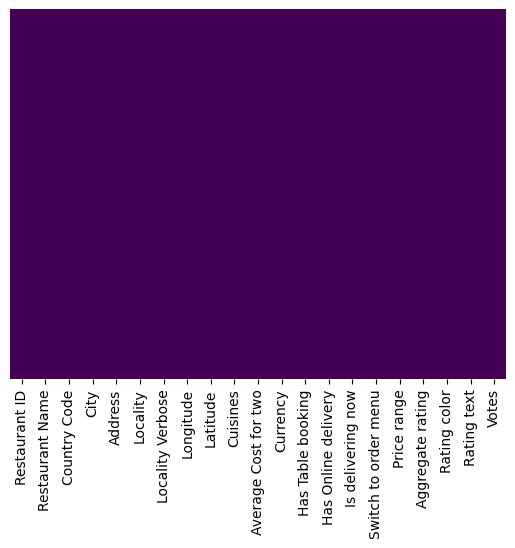

In [32]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap= 'viridis')

In [34]:
df_countrycode = pd.read_excel('/content/Country-Code.xlsx')
df_countrycode

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [35]:
final_df = pd.merge(df, df_countrycode, on= 'Country Code', how= 'left')
final_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [37]:
# Count occurrences of each unique value in the "Country" column and get the index
country_names = final_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [38]:
country_val= final_df.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

([<matplotlib.patches.Wedge at 0x7d9fb9bd74f0>,
 [Text(-0.19278674827836684, -1.0829742700952105, 'India'),
  Text(0.24262393237225424, 1.1752164172782067, 'United States'),
  Text(0.03427027038991, 1.2495301311162539, 'United Kingdom')],
 [Text(-0.10515640815183644, -0.5907132382337511, '94.4%'),
  Text(0.1415306272171483, 0.6855429100789538, '4.7%'),
  Text(0.020562162233945996, 0.7497180786697523, '0.9%')])

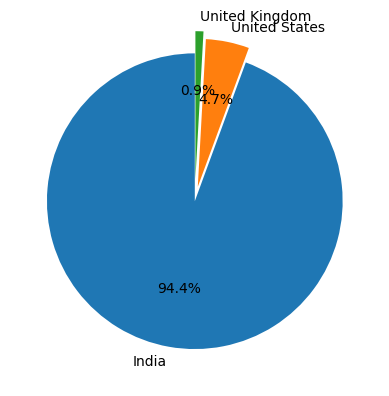

In [46]:
plt.pie(country_val[0:3], labels= country_names[0:3], autopct='%1.1f%%', explode =(0,0.10, 0.15), startangle= 90 )

In [47]:
df_train = pd.read_csv('https://raw.githubusercontent.com/gitanuurage/EDA/main/blackFriday_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [49]:
df_test = pd.read_csv('https://raw.githubusercontent.com/gitanuurage/EDA/main/blackFriday_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [51]:
df_train.size, df_train.shape, df_train.columns

(6600816,
 (550068, 12),
 Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
        'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
        'Product_Category_2', 'Product_Category_3', 'Purchase'],
       dtype='object'))

In [73]:
df_test.size, df_test.shape, df_test.columns

(2569589,
 (233599, 11),
 Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
        'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
        'Product_Category_2', 'Product_Category_3'],
       dtype='object'))

In [100]:
df= df_train.append(df_test)
df.head()

<ipython-input-100-84c2d06b0e16>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [101]:
df.size, df.shape, df.columns

(9404004,
 (783667, 12),
 Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
        'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
        'Product_Category_2', 'Product_Category_3', 'Purchase'],
       dtype='object'))

In [102]:
df.drop(['User_ID'], axis=1, inplace=True)

In [103]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [104]:
df.Gender # or df['Gender']

0         F
1         F
2         F
3         F
4         M
         ..
233594    F
233595    F
233596    F
233597    F
233598    F
Name: Gender, Length: 783667, dtype: object

In [105]:
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=1)


In [106]:
df['Gender']

0         0
1         0
2         0
3         0
4         1
         ..
233594    0
233595    0
233596    0
233597    0
233598    0
Name: Gender, Length: 783667, dtype: uint8

In [107]:
df['Gender'] = df['Gender'].map({0:'F', 1:'M'})

In [110]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [111]:
df['Gender']

0         F
1         F
2         F
3         F
4         M
         ..
233594    F
233595    F
233596    F
233597    F
233598    F
Name: Gender, Length: 783667, dtype: object

In [128]:
df= pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [129]:
df[df.item_name == 'Chips and Fresh Tomato Salsa']

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
25,13,1,Chips and Fresh Tomato Salsa,NaN,$2.39
55,25,1,Chips and Fresh Tomato Salsa,NaN,$2.39
89,39,1,Chips and Fresh Tomato Salsa,NaN,$2.95
183,82,1,Chips and Fresh Tomato Salsa,NaN,$2.95
...,...,...,...,...,...
4231,1689,1,Chips and Fresh Tomato Salsa,NaN,$2.95
4318,1722,1,Chips and Fresh Tomato Salsa,NaN,$2.95
4324,1725,1,Chips and Fresh Tomato Salsa,NaN,$2.95
4425,1764,1,Chips and Fresh Tomato Salsa,NaN,$2.95


In [130]:
df.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [ ]:
prices= [float(value[1:-1]) for value in df.item_price]
df.item_price = prices  # or df['item_price] = prices

In [138]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [140]:
df[df.item_price >10]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98
...,...,...,...,...,...
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75


In [143]:
df[df.item_price <10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
6,3,1,Side of Chips,NaN,1.69
...,...,...,...,...,...
4614,1831,1,Bottled Water,NaN,1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",8.75
4616,1832,1,Chips and Guacamole,NaN,4.45
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [148]:
df[(df.item_price<10) & (df.item_name == 'Chips and Fresh Tomato Salsa')]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
25,13,1,Chips and Fresh Tomato Salsa,NaN,2.39
55,25,1,Chips and Fresh Tomato Salsa,NaN,2.39
89,39,1,Chips and Fresh Tomato Salsa,NaN,2.95
183,82,1,Chips and Fresh Tomato Salsa,NaN,2.95
...,...,...,...,...,...
4231,1689,1,Chips and Fresh Tomato Salsa,NaN,2.95
4318,1722,1,Chips and Fresh Tomato Salsa,NaN,2.95
4324,1725,1,Chips and Fresh Tomato Salsa,NaN,2.95
4425,1764,1,Chips and Fresh Tomato Salsa,NaN,2.95


In [150]:
# Using the filter method to select columns containing the substring 'item'

df.filter(like = 'item', axis=1)

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98
...,...,...
4617,Steak Burrito,11.75
4618,Steak Burrito,11.75
4619,Chicken Salad Bowl,11.25
4620,Chicken Salad Bowl,8.75


In [152]:
# Using the filter method to select columns with names ending in 'e'

df.filter(regex = 'e$', axis=1)

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98
...,...,...
4617,Steak Burrito,11.75
4618,Steak Burrito,11.75
4619,Chicken Salad Bowl,11.25
4620,Chicken Salad Bowl,8.75


In [154]:
df[df.quantity >1]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
18,9,2,Canned Soda,[Sprite],2.18
51,23,2,Canned Soda,[Mountain Dew],2.18
135,60,2,Chicken Salad Bowl,"[Tomatillo Green Chili Salsa, [Sour Cream, Che...",22.50
148,67,2,Steak Burrito,"[Tomatillo-Red Chili Salsa (Hot), [Rice, Chees...",17.98
...,...,...,...,...,...
4491,1786,4,Canned Soft Drink,[Sprite],5.00
4499,1789,2,Canned Soft Drink,[Coke],2.50
4560,1812,2,Canned Soft Drink,[Coke],2.50
4561,1813,2,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",17.50


In [155]:
df[df.choice_description.str.contains('Tomato').notna()]

,order_id,quantity,item_name,choice_description,item_price
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [156]:
df= pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep= '|')
df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [158]:
df.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [160]:
df.occupation.unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [162]:
df.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [163]:
df.groupby('occupation').sum()

<ipython-input-163-8a8cc647fe7e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('occupation').sum()


,user_id,age
occupation,,
administrator,34045,3061
artist,12653,879
doctor,3736,305
educator,44356,3991
engineer,30574,2438
entertainment,7164,526
executive,13514,1239
healthcare,8023,665
homemaker,3101,228


In [168]:
df.groupby('occupation')['age'].max()

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64

In [170]:
df.groupby('occupation')['age'].min()

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64

In [172]:
df.groupby(['occupation', 'gender']).count()

user_id  age  zip_code
occupation    gender                        
administrator F            36   36        36
              M            43   43        43
artist        F            13   13        13
              M            15   15        15
doctor        M             7    7         7
educator      F            26   26        26
              M            69   69        69
engineer      F             2    2         2
              M            65   65        65
entertainment F             2    2         2
              M            16   16        16
executive     F             3    3         3
              M            29   29        29
healthcare    F            11   11        11
              M             5    5         5
homemaker     F             6    6         6
              M             1    1         1
lawyer        F             2    2         2
              M            10   10        10
librarian     F            29   29        29
              M            22   22        22
marketing     F            10   10        10
              M            16   16        16
none          F             4    4         4
              M             5    5         5
other         F            36   36        36
              M            69   69        69
programmer    F             6    6         6
              M            60   60        60
retired       F             1    1         1
              M            13   13        13
salesman      F             3    3         3
              M             9    9         9
scientist     F             3    3         3
              M            28   28        28
student       F            60   60        60
              M           136  136       136
technician    F             1    1         1
              M            26   26        26
writer        F            19   19        19
              M            26   26        26

In [181]:
df.query('occupation == "homemaker"').groupby(['occupation', 'gender']).count()

user_id  age  zip_code
occupation gender                        
homemaker  F             6    6         6
           M             1    1         1

In [183]:
df.query('occupation == "lawyer"').groupby(['occupation', 'gender']).count()

user_id  age  zip_code
occupation gender                        
lawyer     F             2    2         2
           M            10   10        10

In [184]:
df.query('occupation == "lawyer"').groupby(['occupation', 'zip_code']).count()

user_id  age  gender
occupation zip_code                      
lawyer     06371           1    1       1
           20009           1    1       1
           20015           1    1       1
           22202           1    1       1
           37901           1    1       1
           43215           1    1       1
           47130           1    1       1
           53202           1    1       1
           55104           1    1       1
           90034           1    1       1
           90405           1    1       1
           90703           1    1       1

In [186]:
df.query('occupation == "programmer"').groupby(['occupation', 'age']).count()

user_id  gender  zip_code
occupation age                           
programmer 20         1       1         1
           21         3       3         3
           23         3       3         3
           24         2       2         2
           25         5       5         5
           26         2       2         2
           27         7       7         7
           28         4       4         4
           29         3       3         3
           30         5       5         5
           31         2       2         2
           32         2       2         2
           33         2       2         2
           34         1       1         1
           35         3       3         3
           36         1       1         1
           37         2       2         2
           38         3       3         3
           40         2       2         2
           41         2       2         2
           42         1       1         1
           44         1       1         1
           46         2       2         2
           49         2       2         2
           50         1       1         1
           52         1       1         1
           53         1       1         1
           60         1       1         1
           63         1       1         1

In [191]:
df.query("occupation== 'scientist'").groupby(['occupation', 'age']).count()

user_id  gender  zip_code
occupation age                           
scientist  23         1       1         1
           24         1       1         1
           25         1       1         1
           26         1       1         1
           27         1       1         1
           28         2       2         2
           29         1       1         1
           31         2       2         2
           32         1       1         1
           33         3       3         3
           36         1       1         1
           37         1       1         1
           38         2       2         2
           39         4       4         4
           40         2       2         2
           41         1       1         1
           42         2       2         2
           44         1       1         1
           45         2       2         2
           55         1       1         1

In [192]:
df.query('occupation == "student"').groupby(['occupation', 'age']).count()

user_id  gender  zip_code
occupation age                           
student    7          1       1         1
           10         1       1         1
           13         3       3         3
           14         3       3         3
           15         5       5         5
           16         4       4         4
           17        13      13        13
           18        13      13        13
           19        21      21        21
           20        25      25        25
           21        13      13        13
           22        21      21        21
           23        11      11        11
           24         8       8         8
           25        11      11        11
           26         7       7         7
           27         7       7         7
           28         8       8         8
           29         5       5         5
           30         3       3         3
           31         2       2         2
           32         3       3         3
           34         2       2         2
           35         2       2         2
           36         1       1         1
           38         1       1         1
           40         1       1         1
           42         1       1         1

In [194]:
df.groupby('zip_code').occupation.count()

zip_code
00000    2
01002    1
01040    1
01080    1
01331    1
        ..
V0R2M    1
V1G4L    1
V3N4P    1
V5A2B    1
Y1A6B    1
Name: occupation, Length: 795, dtype: int64

In [198]:
df.groupby('gender').occupation.count()

gender
F    273
M    670
Name: occupation, dtype: int64

In [199]:
import numpy as np
import pandas as pd

In [200]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

In [206]:
raw_data


{'regiment': ['Nighthawks',
  'Nighthawks',
  'Nighthawks',
  'Nighthawks',
  'Dragoons',
  'Dragoons',
  'Dragoons',
  'Dragoons',
  'Scouts',
  'Scouts',
  'Scouts',
  'Scouts'],
 'company': ['1st',
  '1st',
  '2nd',
  '2nd',
  '1st',
  '1st',
  '2nd',
  '2nd',
  '1st',
  '1st',
  '2nd',
  '2nd'],
 'name': ['Miller',
  'Jacobson',
  'Ali',
  'Milner',
  'Cooze',
  'Jacon',
  'Ryaner',
  'Sone',
  'Sloan',
  'Piger',
  'Riani',
  'Ali'],
 'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
 'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

In [223]:
df= pd.DataFrame(raw_data, columns= raw_data.keys()) #df= pd.DataFrame(raw_data)
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [218]:
df.groupby

<bound method DataFrame.groupby of       regiment company      name  preTestScore  postTestScore
0   Nighthawks     1st    Miller             4             25
1   Nighthawks     1st  Jacobson            24             94
2   Nighthawks     2nd       Ali            31             57
3   Nighthawks     2nd    Milner             2             62
4     Dragoons     1st     Cooze             3             70
5     Dragoons     1st     Jacon             4             25
6     Dragoons     2nd    Ryaner            24             94
7     Dragoons     2nd      Sone            31             57
8       Scouts     1st     Sloan             2             62
9       Scouts     1st     Piger             3             70
10      Scouts     2nd     Riani             2             62
11      Scouts     2nd       Ali             3             70>

In [221]:
df.groupby('company').count()

,regiment,name,preTestScore,postTestScore
company,,,,
1st,6,6,6,6
2nd,6,6,6,6


In [225]:
df.groupby('regiment').company.count()

regiment
Dragoons      4
Nighthawks    4
Scouts        4
Name: company, dtype: int64

In [228]:
df[df['regiment']=='Scouts'].groupby('regiment').count()

,company,name,preTestScore,postTestScore
regiment,,,,
Scouts,4,4,4,4


In [230]:
df[df['regiment']=='Dragoons'].groupby('regiment').count()

,company,name,preTestScore,postTestScore
regiment,,,,
Dragoons,4,4,4,4


In [232]:
df.groupby(['company', 'regiment']).size()

company  regiment  
1st      Dragoons      2
         Nighthawks    2
         Scouts        2
2nd      Dragoons      2
         Nighthawks    2
         Scouts        2
dtype: int64

In [234]:
df.groupby('company').describe()

preTestScore                                                      \
               count       mean        std  min   25%   50%    75%   max   
company                                                                    
1st              6.0   6.666667   8.524475  2.0  3.00   3.5   4.00  24.0   
2nd              6.0  15.500000  14.652645  2.0  2.25  13.5  29.25  31.0   

        postTestScore                                                       
                count       mean        std   min    25%   50%   75%   max  
company                                                                     
1st               6.0  57.666667  27.485754  25.0  34.25  66.0  70.0  94.0  
2nd               6.0  67.000000  14.057027  57.0  58.25  62.0  68.0  94.0

In [236]:
df.groupby('company').preTestScore.mean()

company
1st     6.666667
2nd    15.500000
Name: preTestScore, dtype: float64

In [238]:
df.groupby(['company', 'regiment']).preTestScore.mean()

company  regiment  
1st      Dragoons       3.5
         Nighthawks    14.0
         Scouts         2.5
2nd      Dragoons      27.5
         Nighthawks    16.5
         Scouts         2.5
Name: preTestScore, dtype: float64

In [240]:
df.groupby(['company', 'regiment']).preTestScore.mean().unstack()

regiment,Dragoons,Nighthawks,Scouts
company,,,
1st,3.5,14.0,2.5
2nd,27.5,16.5,2.5


In [242]:
df.groupby(['company', 'regiment']).size()

company  regiment  
1st      Dragoons      2
         Nighthawks    2
         Scouts        2
2nd      Dragoons      2
         Nighthawks    2
         Scouts        2
dtype: int64

In [246]:
df[df['preTestScore']>20]

,regiment,company,name,preTestScore,postTestScore
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57


In [249]:
df.groupby('name').count()

,regiment,company,preTestScore,postTestScore
name,,,,
Ali,2,2,2,2
Cooze,1,1,1,1
Jacobson,1,1,1,1
Jacon,1,1,1,1
Miller,1,1,1,1
Milner,1,1,1,1
Piger,1,1,1,1
Riani,1,1,1,1
Ryaner,1,1,1,1


In [251]:
df= pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv')
df.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [253]:
df.describe()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
count,55.00000,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,1987.00000,2.461556e+08,1.060315e+07,1.188806e+06,9.412499e+06,17317.236364,72714.800000,416449.890909,6.811818e+05,2.424017e+06,5.959947e+06,1.028614e+06
std,16.02082,4.166216e+07,3.175931e+06,4.597107e+05,2.738512e+06,4267.442664,28278.006893,150506.403782,2.960255e+05,7.259004e+05,1.846401e+06,3.455693e+05
min,1960.00000,1.793232e+08,3.384200e+06,2.884600e+05,3.095700e+06,8530.000000,17190.000000,106670.000000,1.543200e+05,9.121000e+05,1.855400e+06,3.282000e+05
25%,1973.50000,2.106215e+08,9.096958e+06,9.253150e+05,8.060014e+06,14819.000000,53400.000000,354911.500000,4.384300e+05,2.105336e+06,4.843350e+06,7.896260e+05
50%,1987.00000,2.422829e+08,1.140151e+07,1.322390e+06,1.018259e+07,17030.000000,84230.000000,423557.000000,7.412910e+05,2.329950e+06,6.591900e+06,1.032200e+06
75%,2000.50000,2.833697e+08,1.308449e+07,1.432762e+06,1.160509e+07,20561.500000,92930.000000,512137.000000,9.002150e+05,3.073600e+06,7.168450e+06,1.239302e+06
max,2014.00000,3.188571e+08,1.487290e+07,1.932270e+06,1.296110e+07,24700.000000,109060.000000,687730.000000,1.135610e+06,3.795200e+06,8.142200e+06,1.661700e+06


In [256]:
df.dtypes

Year                  int64
Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

In [258]:
df.shape

(55, 12)

In [260]:
df.columns

Index(['Year', 'Population', 'Total', 'Violent', 'Property', 'Murder',
       'Forcible_Rape', 'Robbery', 'Aggravated_assault', 'Burglary',
       'Larceny_Theft', 'Vehicle_Theft'],
      dtype='object')

In [262]:
df.groupby('Year').sum()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600


In [265]:
df.Population

0     179323175
1     182992000
2     185771000
3     188483000
4     191141000
5     193526000
6     195576000
7     197457000
8     199399000
9     201385000
10    203235298
11    206212000
12    208230000
13    209851000
14    211392000
15    213124000
16    214659000
17    216332000
18    218059000
19    220099000
20    225349264
21    229146000
22    231534000
23    233981000
24    236158000
25    238740000
26    240132887
27    242282918
28    245807000
29    248239000
30    248709873
31    252177000
32    255082000
33    257908000
34    260341000
35    262755000
36    265228572
37    267637000
38    270296000
39    272690813
40    281421906
41    285317559
42    287973924
43    290690788
44    293656842
45    296507061
46    299398484
47    301621157
48    304374846
49    307006550
50    309330219
51    311587816
52    313873685
53    316497531
54    318857056
Name: Population, dtype: int64

In [268]:
df.ndim

2

In [271]:
df.loc[0:5, 'Year':'Murder']

,Year,Population,Total,Violent,Property,Murder
0,1960,179323175,3384200,288460,3095700,9110
1,1961,182992000,3488000,289390,3198600,8740
2,1962,185771000,3752200,301510,3450700,8530
3,1963,188483000,4109500,316970,3792500,8640
4,1964,191141000,4564600,364220,4200400,9360
5,1965,193526000,4739400,387390,4352000,9960


In [273]:
df.iloc[:11 , :]

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


In [278]:
df.loc[ :10,'Robbery':]

,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,107840,154320,912100,1855400,328200
1,106670,156760,949600,1913000,336000
2,110860,164570,994300,2089600,366800
3,116470,174210,1086400,2297800,408300
4,130390,203050,1213200,2514400,472800
5,138690,215330,1282500,2572600,496900
6,157990,235330,1410100,2822000,561200
7,202910,257160,1632100,3111600,659800
8,262840,286700,1858900,3482700,783600
9,298850,311090,1981900,3888600,878500


In [281]:
df[df.Year==2000]

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
40,2000,281421906,11608072,1425486,10182586,15586,90178,408016,911706,2050992,6971590,1160002


In [284]:
df[(df.Year==2000) & (df.Murder>8000)]

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
40,2000,281421906,11608072,1425486,10182586,15586,90178,408016,911706,2050992,6971590,1160002


In [286]:
df[df.Year.isin([2000])].groupby('Murder').count()

,Year,Population,Total,Violent,Property,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Murder,,,,,,,,,,,
15586,1,1,1,1,1,1,1,1,1,1,1


In [287]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

In [288]:
data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

In [289]:
new_data = pd.concat([data1, data2])
new_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [290]:
new_data_col = pd.concat([data1, data2], axis=1)
new_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [291]:
data_new_row = pd.concat([data1, data2], axis=0)
data_new_row

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [292]:
pd.merge(new_data, data3, on = 'subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15
